Iteration 1, loss = 0.71296209
Iteration 2, loss = 0.64989665
Iteration 3, loss = 0.59543560
Iteration 4, loss = 0.53853451
Iteration 5, loss = 0.49110170
Iteration 6, loss = 0.44370926
Iteration 7, loss = 0.40245409
Iteration 8, loss = 0.36778071
Iteration 9, loss = 0.33459330
Iteration 10, loss = 0.30620506
Predictions on test data: ['Sepia' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Sepia'
 'Sepia' 'Sepia' 'Normal' 'Sepia' 'Sepia' 'Sepia' 'Sepia']
Actual test labels: ['Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Sepia', 'Sepia', 'Sepia', 'Sepia', 'Sepia', 'Sepia', 'Sepia', 'Sepia']
Accuracy: 0.8667
Classification Report:
              precision    recall  f1-score   support

      Normal       0.86      0.86      0.86         7
       Sepia       0.88      0.88      0.88         8

    accuracy                           0.87        15
   macro avg       0.87      0.87      0.87        15
weighted avg       0.87      0.87      0.87        15



C:\Users\berin\PycharmProjects\Lab7\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


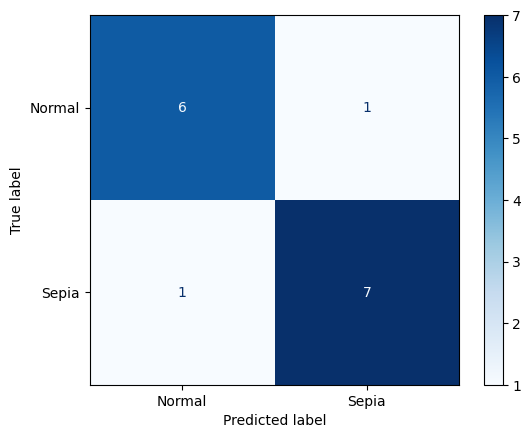

In [1]:
import numpy as np
from PIL import Image
import os
import io
from sklearn import neural_network
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Resize and flatten images
def resize_and_flatten(images, target_size=(64, 64)):
    resized_images = []
    for img in images:
        img_resized = img.resize(target_size)
        img_array = np.array(img_resized)
        img_flattened = img_array.flatten()
        resized_images.append(img_flattened)
    return np.array(resized_images)

# Load the images and labels
def loadData():
    currentPath = os.getcwd()
    currentPath = os.path.join(currentPath, "Photos")
    inputs = []
    outputs = []

    for file in os.listdir(currentPath):
        if "person" in file:
            outputs.append("Normal")
        else:
            outputs.append("Sepia")

        file_path = os.path.join(currentPath, file)
        with open(file_path, mode="rb") as f:
            image = Image.open(io.BytesIO(f.read()))
            image = image.convert('RGB')  # Ensure the image is RGB
            inputs.append(image)

    return inputs, outputs

# Split the dataset into train/test
def splitData(inputs, outputs):
    np.random.seed(5)
    indexes = [i for i in range(len(inputs))]
    trainSample = np.random.choice(indexes, int(0.7 * len(inputs)), replace=False)
    testSample = [i for i in indexes if i not in trainSample]

    trainInputs = [inputs[i] for i in trainSample]
    trainOutputs = [outputs[i] for i in trainSample]
    testInputs = [inputs[i] for i in testSample]
    testOutputs = [outputs[i] for i in testSample]

    return trainInputs, trainOutputs, testInputs, testOutputs

inputs, outputs = loadData()

inputs_resized_flattened = resize_and_flatten(inputs, target_size=(32, 32))

trainInputs, trainOutputs, testInputs, testOutputs = splitData(inputs_resized_flattened, outputs)

trainInputs = np.array(trainInputs) / 255.0
testInputs = np.array(testInputs) / 255.0

classifier = neural_network.MLPClassifier(
        hidden_layer_sizes=(5,),
        activation='relu',
        solver='adam',
        max_iter=10,
        learning_rate_init=0.001,
        random_state=1,
        verbose=10
    )

classifier.fit(trainInputs, trainOutputs)

predictions = classifier.predict(testInputs)

print("Predictions on test data:", predictions)
print("Actual test labels:", testOutputs)

accuracy = accuracy_score(testOutputs, predictions)
print(f"Accuracy: {accuracy:.4f}")

print("Classification Report:")
print(classification_report(testOutputs, predictions))

cm = confusion_matrix(testOutputs, predictions, labels=["Normal", "Sepia"])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Sepia"])
disp.plot(cmap='Blues')